# 와인 분류하기

## 패키지 불러오기

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [2]:
wine = load_wine()

## 데이터 뜯어보기

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
#wine.DESCR

In [5]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine.data.shape  # 178개의 데이터셋, 13개의 feature

(178, 13)

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## DataFrame 만들기

In [10]:
import pandas as pd

In [11]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
wine_label_df = pd.DataFrame(wine.target, columns=['label'])
wine_label_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [13]:
wine_df = pd.concat([wine_df, wine_label_df],axis=1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [14]:
wine_df.shape

(178, 14)

In [15]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

## feature, label 분리
- 순수한 모델의 성능을 알아보기 위해 feature의 가공은 최소화할 예정

In [16]:
x = wine_df.drop('label', axis=1)
x.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [17]:
y = wine_df['label']
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: label, Length: 178, dtype: int32

## 스케일링

In [18]:
x['proline'].max(), x['proline'].min()

(1680.0, 278.0)

In [19]:
x['nonflavanoid_phenols'].max(), x['nonflavanoid_phenols'].min()

(0.66, 0.13)

스케일링이 필요한 이유
- 'proline'의 값 크기와 'nonflavanoid_phenols'의 값 크기의 격차가 매우 심하게 나타남
- 값의 크기가 모델의 학습에 영향을 주기 때문에 데이터의 범위를 같은 조건으로 만들어줄 필요가 있음
- outlier 데이터가 심하지 않아 가장 기본적인 StandardScaler를 이용

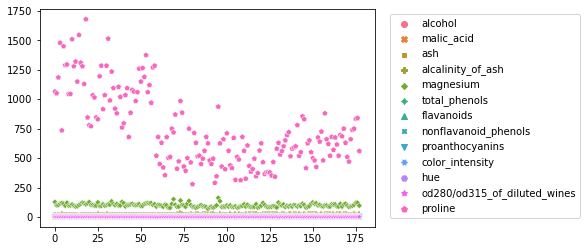

In [20]:
sns.scatterplot(data=x)
plt.legend(bbox_to_anchor=(1.03, 1), loc=2)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()

In [23]:
x_scaled = ss.fit_transform(x)
x_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

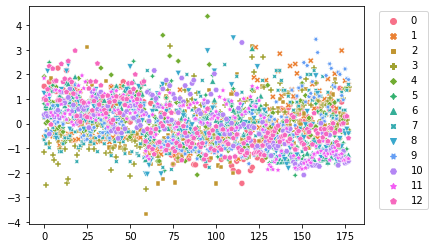

In [24]:
sns.scatterplot(data=x_scaled)
plt.legend(bbox_to_anchor=(1.03, 1), loc=2)

## train, test셋 분리

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=95)

In [27]:
x_train.shape, x_test.shape

((142, 13), (36, 13))

In [28]:
y_train.shape, y_test.shape

((142,), (36,))

## 모델 적용

### 1. Decision Tree Classifier

#### 1-1. 모델 생성

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt_cf = DecisionTreeClassifier(random_state=95)
dt_cf

DecisionTreeClassifier(random_state=95)

#### 1-2. 모델 학습

In [31]:
dt_cf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=95)

#### 1-3. 학습을 토대로 test

In [32]:
pred_test_dt_cf = dt_cf.predict(x_test)

#### 1-4. 모델 평가

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [34]:
score_test = (y_test == pred_test_dt_cf).mean()

In [35]:
score_test

0.9166666666666666

In [36]:
dt_cf.score(x_train, y_train), dt_cf.score(x_test, y_test)  # Overfitting

(1.0, 0.9166666666666666)

In [37]:
print(classification_report(y_test, pred_test_dt_cf))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.95      0.90      0.92        20
           2       0.83      1.00      0.91         5

    accuracy                           0.92        36
   macro avg       0.90      0.94      0.91        36
weighted avg       0.92      0.92      0.92        36



### 2. Random Forest Classifier

#### 2-1. 모델 생성

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_cf = RandomForestClassifier(random_state=95)
rf_cf

RandomForestClassifier(random_state=95)

#### 2-2. 모델 학습

In [40]:
rf_cf.fit(x_train, y_train)

RandomForestClassifier(random_state=95)

#### 2-3. 학습을 토대로 test

In [41]:
pred_test_rf_cf = rf_cf.predict(x_test)

#### 2-4. 모델 평가

In [42]:
score_test = (y_test == pred_test_rf_cf).mean()

In [43]:
score_test

0.9444444444444444

In [44]:
rf_cf.score(x_train, y_train), rf_cf.score(x_test, y_test)

(1.0, 0.9444444444444444)

In [45]:
print(classification_report(y_test, pred_test_rf_cf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.90      0.95        20
           2       0.83      1.00      0.91         5

    accuracy                           0.94        36
   macro avg       0.92      0.97      0.94        36
weighted avg       0.95      0.94      0.94        36



### 3. svm (Support Vector Machine)

#### 3-1. 모델 생성

In [46]:
from sklearn import svm

In [47]:
model_svm = svm.SVC(random_state=95)
model_svm

SVC(random_state=95)

#### 3-2. 모델 학습

In [48]:
model_svm.fit(x_train, y_train)

SVC(random_state=95)

#### 3-3. 학습을 토대로 test

In [49]:
pred_test_model_svm = model_svm.predict(x_test)

#### 3-4. 모델 평가

In [50]:
score_test = (y_test == pred_test_model_svm).mean()

In [51]:
score_test

1.0

In [52]:
model_svm.score(x_train, y_train), model_svm.score(x_test, y_test)

(1.0, 1.0)

In [53]:
print(classification_report(y_test, pred_test_model_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 4. SGDClassifier (Stochastic Gradient Descent Classifier, 확률적 경사 하강법)

#### 4-1. 모델 생성

In [54]:
from sklearn.linear_model import SGDClassifier

In [55]:
SGD_cf = SGDClassifier(random_state=95)
SGD_cf

SGDClassifier(random_state=95)

#### 4-2. 모델 학습

In [56]:
SGD_cf.fit(x_train, y_train)

SGDClassifier(random_state=95)

#### 4-3. 학습을 토대로 test

In [57]:
pred_test_SGD_cf = SGD_cf.predict(x_test)

#### 4-4. 모델 평가

In [58]:
score_test = (y_test == pred_test_SGD_cf).mean()

In [59]:
score_test

0.9444444444444444

In [60]:
SGD_cf.score(x_train, y_train), SGD_cf.score(x_test, y_test)

(1.0, 0.9444444444444444)

In [61]:
print(classification_report(y_test, pred_test_SGD_cf))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00         5

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



### 5. Logistic Regression

#### 5-1. 모델 생성

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression(random_state=95)
lr

LogisticRegression(random_state=95)

#### 5-2. 모델 학습

In [64]:
lr.fit(x_train, y_train)  # max_iter의 디폴트 값인 100번동안 결과값에 수렴하지 못해서 경고 발생

LogisticRegression(random_state=95)

In [65]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=95)

#### 5-3. 학습을 토대로 test

In [66]:
pred_test_lr = lr.predict(x_test)

#### 5-4. 모델 평가

In [67]:
score_test = (y_test == pred_test_lr).mean()

In [68]:
score_test

1.0

In [69]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(1.0, 1.0)

In [70]:
print(classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 모델 비교

- 순수 모델 성능을 보기 위해 하이퍼 파라미터는 최대한 디폴트 값으로 지정
- 성능은 train_test_split의 분류에 따라 달라질 수 있음
- label의 항목들 사이즈가 약간씩 다른 것을 적용하기 위해 평균은 weighted avg를 이용함

평가 항목
- macro avg : 각 항목을 더한 후, 전체에 대한 평균을 구하는 방식 (레이블의 비율은 고려되지 않음)
- weighted avg : 각 레이블의 비율에 따라 가중치를 적용한 평균을 구하는 방식  
(macro avg, weighted avg : https://rython.tistory.com/14)
<br><br>
- precision(정밀도) : TP / (TP+FP), 모델이 True로 분류한 것 중 실제 True로 분류된 비율
- recall(재현율, 민감도) : TP / (TP+FN), 실제 True로 분류된 것 중 모델이 True로 분류한 비율
- accuracy(정확도) : (TP + TN) / (TP + FN + FP +TN), 전체에서 모델이 맞게 예측한 비율 
- F1-score : precision과 recall의 조화평균

In [71]:
model_list = [pred_test_dt_cf, pred_test_rf_cf, pred_test_model_svm, pred_test_SGD_cf, pred_test_lr]

In [72]:
model_name = ['DecisionTree', 'RandomForest', 'svm', 'SGDClassifier', 'LogisticRegression']

In [73]:
acc_list = []
for i in model_list:
    acc = round(accuracy_score(y_test, i), 2)
    acc_list.append(acc)
acc_list

[0.92, 0.94, 1.0, 0.94, 1.0]

In [74]:
recall_list = []
for i in model_list:
    rec = round(recall_score(y_test, i, average='weighted'), 2)
    recall_list.append(rec)
recall_list

[0.92, 0.94, 1.0, 0.94, 1.0]

In [75]:
precision_list = []
for i in model_list:
    rec = round(precision_score(y_test, i, average='weighted'), 2)
    precision_list.append(rec)
precision_list

[0.92, 0.95, 1.0, 0.94, 1.0]

In [76]:
f1_list = []
for i in model_list:
    f1 = round(f1_score(y_test, i, average='weighted'), 2)
    f1_list.append(f1)
f1_list

[0.92, 0.94, 1.0, 0.94, 1.0]

In [77]:
import pandas as pd

In [78]:
score_df = pd.DataFrame([acc_list, recall_list, precision_list, f1_list], 
                        index=['accuracy', 'recall', 'precision', 'f1'], columns=model_name)

In [79]:
score_df = score_df.transpose()
score_df

,accuracy,recall,precision,f1
DecisionTree,0.92,0.92,0.92,0.92
RandomForest,0.94,0.94,0.95,0.94
svm,1.00,1.00,1.00,1.00
SGDClassifier,0.94,0.94,0.94,0.94
LogisticRegression,1.00,1.00,1.00,1.00


## 평가

### 1. 기초적인 평가 (accuracy)

In [80]:
score_df.sort_values(by='accuracy', ascending=False)['accuracy']

svm                   1.00
LogisticRegression    1.00
RandomForest          0.94
SGDClassifier         0.94
DecisionTree          0.92
Name: accuracy, dtype: float64

- accuracy로 볼 때는 svm과 LogisticRegression이 가장 좋은 성능을 보임

### 2. 와인의 품질을 평가할 때
- precision과 recall 중 어떤게 더 중요한지 파악하고자 함
- precision과 recall 선택하기 어려워서 생각 흐름을 밑에 적으면서 선택했음

recall 관점
- 실제 True로 분류된 것 중, 모델이 True로 분류한 비율
- 실제 저품질 와인으로 분류된 것 중, 와인 판별기가 저품질로 분류한 비율
- 실제 저품질인 와인 10개를 와인판별기가 저품질의 와인을 7개 찾아냈을 때
- 실제 저품질인 와인 10개 중, 와인판별기가 저품질의 와인을 7개 분류하고 시중에 유통 (고품질 3개를 얻은 소비자는 개꿀)

precision 관점
- 모델이 True로 분류한 것 중 실제 True로 분류된 비율
- 와인판별기가 저품질로 분류한 것 중, 실제 저품질 와인의 비율
- 와인판별기가 저품질인 와인 10개를 분류했는데, 그 중 7개만 실제로 저품질이었을 때
- 와인판별기가 저품질의 와인로 분류한 10개를 저품질 와인으로 유통했을 때 실제로 7개만 시중에 유통

결론
- precision 관점이 더 중요하다고 판단됨
- 와인판별기로 분류된 저품질 와인 10개가 시중에 유통됐을 때 실제로 저품질 와인이 7개만 있다면 고품질 와인 3개가 저품질로 유통되기 때문

In [81]:
score_df.sort_values(by='precision', ascending=False)['precision']

svm                   1.00
LogisticRegression    1.00
RandomForest          0.95
SGDClassifier         0.94
DecisionTree          0.92
Name: precision, dtype: float64

- precision 관점에서 svm과 LogisticRegression이 가장 좋은 성능을 보임

### 3. 총 평가

In [82]:
score_df.sort_values(by='f1', ascending=False)

,accuracy,recall,precision,f1
svm,1.00,1.00,1.00,1.00
LogisticRegression,1.00,1.00,1.00,1.00
RandomForest,0.94,0.94,0.95,0.94
SGDClassifier,0.94,0.94,0.94,0.94
DecisionTree,0.92,0.92,0.92,0.92


- 현재의 조건에서는 모든 관점에서 **svm**모델과 **LogisticRegression**모델이 가장 좋은 성능을 나타냄
- DecisionTree는 모든 부분에서 가장 낮은 성능을 나타냄